Toxic Tweets Dataset : NLP Problem




In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import roc_curve, roc_auc_score



## Importing the data

In [ ]:
df = pd.read_csv('FinalBalancedDataset.csv')
df.head()


,Unnamed: 0,Toxicity,tweet
0,0,0,@user when a father is dysfunctional and is s...
1,1,0,@user @user thanks for #lyft credit i can't us...
2,2,0,bihday your majesty
3,3,0,#model i love u take with u all the time in ...
4,4,0,factsguide: society now #motivation


In [ ]:
df.shape

(56745, 3)

In [ ]:
# Review Frquency Count
vc_df = pd.DataFrame(df['Toxicity'].value_counts()).reset_index()
vc_df.columns = ['Toxicity', 'Count']
# vc_df['Toxicity'] = vc_df['Toxicity'].map({1 : 'positive', 0: 'negative'})
vc_df

,Toxicity,Count
0,0,32592
1,1,24153


## Pre-processing the data

### Some common Problems:


1.   Remove Punctuation
2.   Replace short words
3.   Making text lower case
4.   Remove stopwords
5.   Lemmatization



#### Removing punctuation (.!<>{}’,”(/)-\)

In [ ]:
df['tweet']

0         @user when a father is dysfunctional and is s...
1        @user @user thanks for #lyft credit i can't us...
2                                      bihday your majesty
3        #model   i love u take with u all the time in ...
4                   factsguide: society now    #motivation
                               ...                        
56740    you's a muthaf***in lie &#8220;@LifeAsKing: @2...
56741    you've gone and broke the wrong heart baby, an...
56742    young buck wanna eat!!.. dat nigguh like I ain...
56743                youu got wild bitches tellin you lies
56744    ~~Ruffled | Ntac Eileen Dahlia - Beautiful col...
Name: tweet, Length: 56745, dtype: object

In [ ]:
# Replacing punctuations with space
df['tweet_processed'] = df['tweet'].str.replace("[^a-zA-Z0-9]", " ")

# Re ordering columns
df = df[['tweet','tweet_processed','Toxicity']]

<ipython-input-6-31f3e5f8f5c8>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['tweet_processed'] = df['tweet'].str.replace("[^a-zA-Z0-9]", " ")


In [ ]:
df['tweet_processed']

0          user when a father is dysfunctional and is s...
1         user  user thanks for  lyft credit i can t us...
2                                      bihday your majesty
3         model   i love u take with u all the time in ...
4                   factsguide  society now     motivation
                               ...                        
56740    you s a muthaf   in lie   8220  LifeAsKing   2...
56741    you ve gone and broke the wrong heart baby  an...
56742    young buck wanna eat     dat nigguh like I ain...
56743                youu got wild bitches tellin you lies
56744      Ruffled   Ntac Eileen Dahlia   Beautiful col...
Name: tweet_processed, Length: 56745, dtype: object

In [ ]:
df.shape

(56745, 3)

*italicized text*#### Lowercase characer

In [ ]:
# make entire text lowercase
df['tweet_processed'] = [row.lower() for row in df['tweet_processed']]

In [ ]:
df['tweet_processed']

0          user when a father is dysfunctional and is s...
1         user  user thanks for  lyft credit i can t us...
2                                      bihday your majesty
3         model   i love u take with u all the time in ...
4                   factsguide  society now     motivation
                               ...                        
56740    you s a muthaf   in lie   8220  lifeasking   2...
56741    you ve gone and broke the wrong heart baby  an...
56742    young buck wanna eat     dat nigguh like i ain...
56743                youu got wild bitches tellin you lies
56744      ruffled   ntac eileen dahlia   beautiful col...
Name: tweet_processed, Length: 56745, dtype: object

#### Remove stop words

In [ ]:
# Removing Stopwords Begin
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk import word_tokenize

stop_words = stopwords.words('english') # extracting all the stop words in english language and storing it in a variable called stop_words -> set

# Making custom list of words to be removed
add_words = ['user']

# Adding to the list of words
stop_words.extend(add_words)

# Function to remove stop words
def remove_stopwords(twe):
    # iNPUT : IT WILL TAKE ROW/REVIEW AS AN INPUT
    # take the paragraph, break into words, check if the word is a stop word, remove if stop word, combine the words into a para again
    tweet_tokenized = word_tokenize(twe)
    twe_new = " ".join([i for i in tweet_tokenized if i not in stop_words])
    return twe_new    #new tweet

# Removing stopwords
df['tweet_processed'] = [remove_stopwords(r) for r in df['tweet_processed']]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df['tweet_processed']

0        father dysfunctional selfish drags kids dysfun...
1        thanks lyft credit use cause offer wheelchair ...
2                                           bihday majesty
3                              model love u take u time ur
4                            factsguide society motivation
                               ...                        
56740    muthaf lie 8220 lifeasking 20 pearls corey ema...
56741      gone broke wrong heart baby drove redneck crazy
56742    young buck wan na eat dat nigguh like aint fuc...
56743                    youu got wild bitches tellin lies
56744    ruffled ntac eileen dahlia beautiful color com...
Name: tweet_processed, Length: 56745, dtype: object

#### Lemmatization

In [ ]:
# Begin Lemmatization
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# function to convert nltk tag to wordnet tag
lemmatizer = WordNetLemmatizer()

# Finds the part of speech tag
# Convert the detailed POS tag into a shallow information
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

# lemmatize sentence using pos tag
def lemmatize_sentence(sentence):
  # word tokenize -> pos tag (detailed) -> wordnet tag (shallow pos) -> lemmatizer -> root word
    #tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  # output will be a list of tuples -> [(word,detailed_tag)]
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged) # output -> [(word,shallow_tag)]
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)


df['tweet_processed'] = df['tweet_processed'].apply(lambda x: lemmatize_sentence(x))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


1) split sentence into words
2) get the detailed POS for each word
3) get shallow POS from detailed POS
4) do lemmatisation for each word
5) join all the words to form sentence

In [ ]:
df['tweet_processed']

0        father dysfunctional selfish drag kid dysfunct...
1        thanks lyft credit use cause offer wheelchair ...
2                                           bihday majesty
3                              model love u take u time ur
4                            factsguide society motivation
                               ...                        
56740    muthaf lie 8220 lifeasking 20 pearl corey eman...
56741        go break wrong heart baby drive redneck crazy
56742    young buck wan na eat dat nigguh like aint fuc...
56743                       youu get wild bitch tellin lie
56744    ruffle ntac eileen dahlia beautiful color comb...
Name: tweet_processed, Length: 56745, dtype: object

#### Plotting Freqent Words

In [ ]:
df.Toxicity.values

array([0, 0, 0, ..., 1, 1, 0])

In [ ]:
df.dtypes

tweet              object
tweet_processed    object
Toxicity            int64
dtype: object

In [ ]:
df

,tweet,tweet_processed,Toxicity
0,@user when a father is dysfunctional and is s...,father dysfunctional selfish drag kid dysfunct...,0
1,@user @user thanks for #lyft credit i can't us...,thanks lyft credit use cause offer wheelchair ...,0
2,bihday your majesty,bihday majesty,0
3,#model i love u take with u all the time in ...,model love u take u time ur,0
4,factsguide: society now #motivation,factsguide society motivation,0
...,...,...,...
56740,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,muthaf lie 8220 lifeasking 20 pearl corey eman...,1
56741,"you've gone and broke the wrong heart baby, an...",go break wrong heart baby drive redneck crazy,1
56742,young buck wanna eat!!.. dat nigguh like I ain...,young buck wan na eat dat nigguh like aint fuc...,1
56743,youu got wild bitches tellin you lies,youu get wild bitch tellin lie,1


#### WordCloud

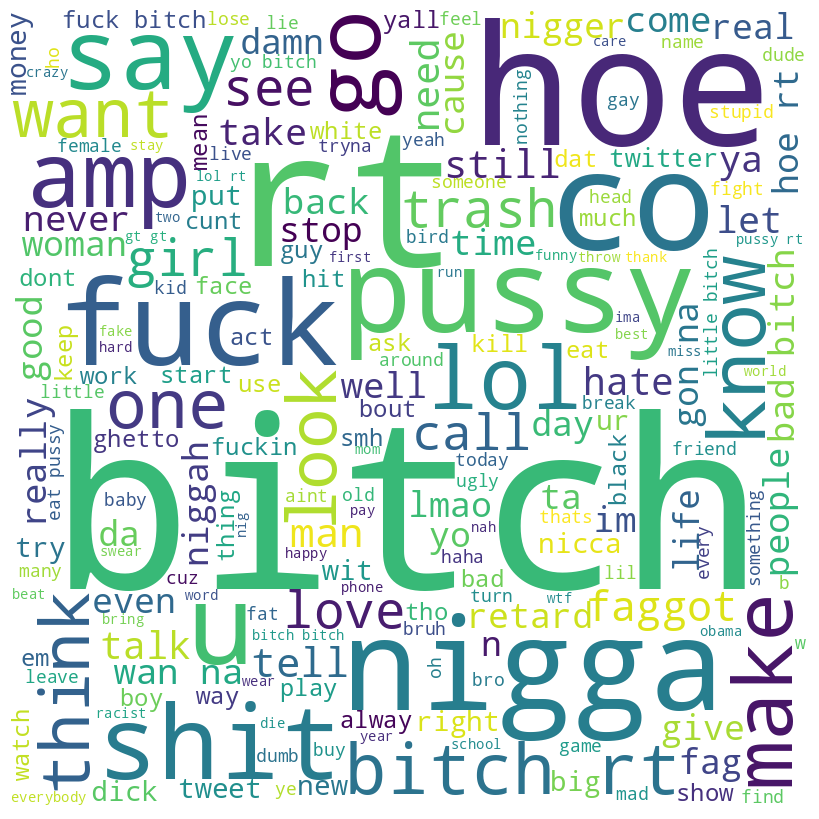

In [ ]:
##
## Bilding a Word Cloud
##
from wordcloud import WordCloud
word_cloud_df = df.loc[df['Toxicity'] == 1,:]
all_words = ' '.join([text for text in word_cloud_df['tweet_processed']])


wordcloud = WordCloud(width = 800, height = 800,
                      background_color ='white',
                      min_font_size = 10).generate(all_words)

#plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()
# negative tweets

### Bag of Words Model

In [ ]:
# Importing module
from sklearn.feature_extraction.text import TfidfVectorizer

# Creating matrix of top 2500 tokens
tfidf = TfidfVectorizer(max_features=2500)
# tmp_df = tfidf.fit_transform(df.review_processed)
# feature_names = tfidf.get_feature_names()
# pd.DataFrame(tmp_df.toarray(), columns = feature_names).head()

X = tfidf.fit_transform(df.tweet_processed).toarray()
y=df.Toxicity.values
featureNames = tfidf.get_feature_names_out()


X, y


# # # Splitting the dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=777)


In [ ]:
X_train.shape, X_test.shape

((45396, 2500), (11349, 2500))

In [ ]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Building the ML model

## Feature Importance

In [ ]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred_test = dt.predict(X_test)
y_pred_train = dt.predict(X_train)
print("Training Accuracy score:",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test))





Training Accuracy score: 0.9976649925103533
Testing Accuracy score: 0.9251916468411314


In [ ]:
##featureImportance.sort_values(by='Importance')
featureImportance = pd.DataFrame({i : j for i,j in zip(dt.feature_importances_,featureNames)}.items(),columns = ['Importance','word'])
featureImportance.sort_values(by='Importance',ascending=False)

,Importance,word
162,3.134312e-01,bitch
610,1.450542e-01,hoe
1004,8.448437e-02,pussy
447,2.317682e-02,faggot
1078,2.172398e-02,rt
...,...,...
526,2.854735e-07,fun
1354,2.854476e-07,week
515,2.821756e-07,friday
158,2.807770e-07,bihday


In [ ]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94      6565
           1       0.92      0.90      0.91      4784

    accuracy                           0.93     11349
   macro avg       0.92      0.92      0.92     11349
weighted avg       0.93      0.93      0.93     11349



[[6192  373]
 [ 476 4308]]


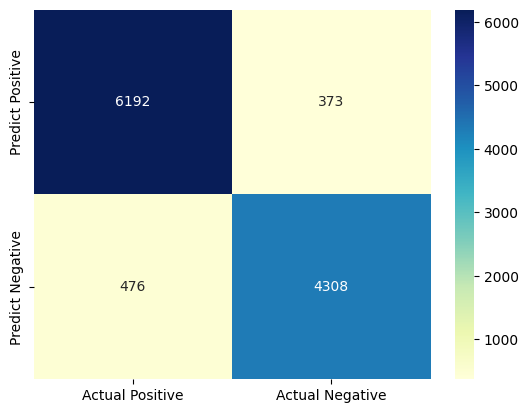

In [ ]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test,y_pred_test)
print(cm)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive', 'Actual Negative'],
                        index=['Predict Positive', 'Predict Negative'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()


ROC AUC: 0.921842610682473


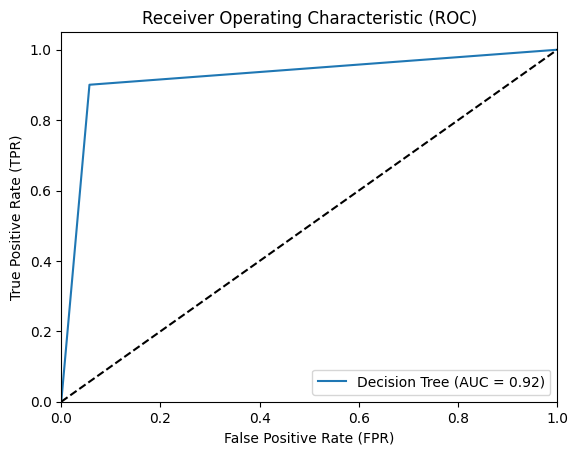

In [ ]:
fpr, tpr,_= roc_curve(y_test, y_pred_test)
auc_score = roc_auc_score(y_test, y_pred_test)
print("ROC AUC:", auc_score)
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--') # random classifier line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [ ]:
#K-NN classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred_test = knn.predict(X_test)
y_pred_train = knn.predict(X_train)
print("Training Accuracy score:",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test))





Training Accuracy score: 0.8208652744735219
Testing Accuracy score: 0.755925632214292


In [ ]:
print(classification_report(y_test, y_pred_test))


              precision    recall  f1-score   support

           0       0.72      0.95      0.82      6565
           1       0.87      0.50      0.63      4784

    accuracy                           0.76     11349
   macro avg       0.79      0.72      0.72     11349
weighted avg       0.78      0.76      0.74     11349



[[6207  358]
 [2412 2372]]


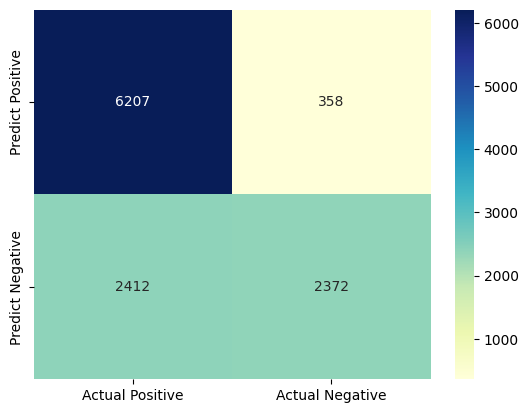

In [ ]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test,y_pred_test)
print(cm)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive', 'Actual Negative'],
                        index=['Predict Positive', 'Predict Negative'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()


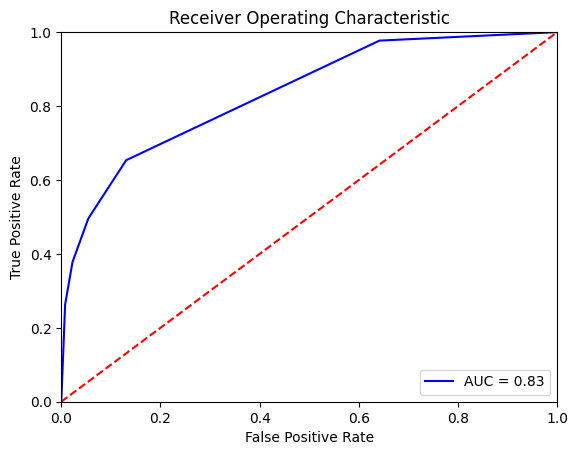

In [ ]:
probs = knn.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
random = RandomForestClassifier(n_estimators = 200, max_depth = 8, max_features='sqrt')
random.fit(X_train,y_train)
y_pred_test = random.predict(X_test)
y_pred_train = random.predict(X_train)
print("Training Accuracy score:",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test))



Training Accuracy score: 0.7939686315974975
Testing Accuracy score: 0.7908185743237289


In [ ]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.74      0.99      0.85      6565
           1       0.98      0.52      0.68      4784

    accuracy                           0.79     11349
   macro avg       0.86      0.75      0.76     11349
weighted avg       0.84      0.79      0.77     11349



[[6504   61]
 [2313 2471]]


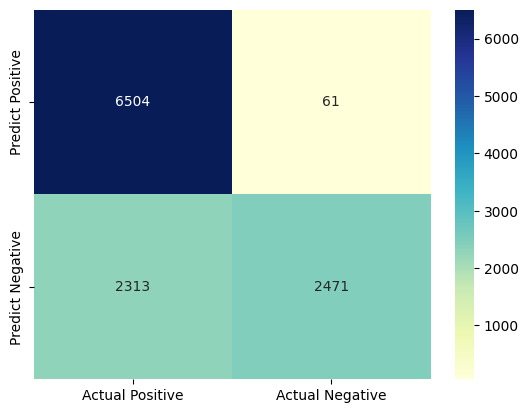

In [ ]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test,y_pred_test)
print(cm)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive', 'Actual Negative'],
                        index=['Predict Positive', 'Predict Negative'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()


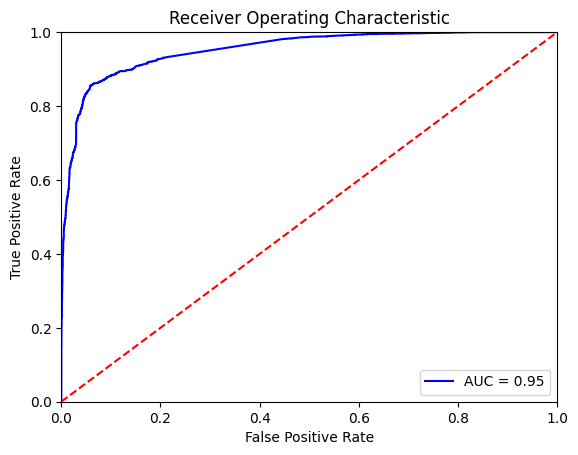

In [ ]:
probs = random.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
#Naive Bayes
from sklearn import model_selection, naive_bayes, svm
Naive = naive_bayes.MultinomialNB()
Naive.fit(X_train,y_train)# predict the labels on validation dataset
y_pred_test = Naive.predict(X_test)
y_pred_train = Naive.predict(X_train)
print("Training Accuracy score:",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test))



Training Accuracy score: 0.911908538197198
Testing Accuracy score: 0.9053661115516786


In [ ]:
print(classification_report(y_test, y_pred_test))


              precision    recall  f1-score   support

           0       0.93      0.91      0.92      6565
           1       0.88      0.90      0.89      4784

    accuracy                           0.91     11349
   macro avg       0.90      0.90      0.90     11349
weighted avg       0.91      0.91      0.91     11349



[[5965  600]
 [ 474 4310]]


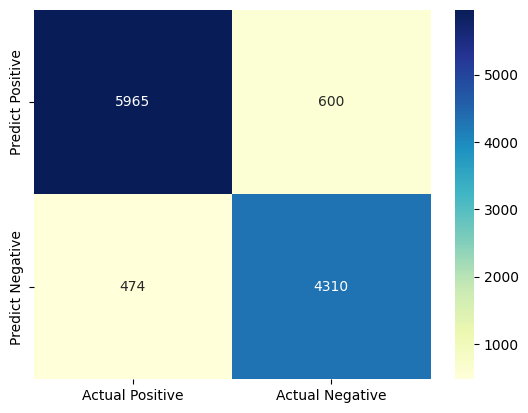

In [ ]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test,y_pred_test)
print(cm)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive', 'Actual Negative'],
                        index=['Predict Positive', 'Predict Negative'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

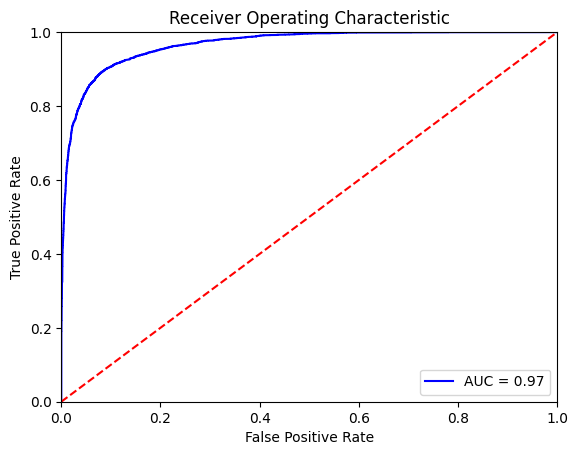

In [ ]:
probs = Naive.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
# SVM
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(X_train,y_train)# predict the labels on validation dataset
y_pred_test = SVM.predict(X_test)
y_pred_train = SVM.predict(X_train)
print("Training Accuracy score:",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test))


In [ ]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      6565
           1       0.96      0.90      0.93      4784

    accuracy                           0.94     11349
   macro avg       0.95      0.94      0.94     11349
weighted avg       0.94      0.94      0.94     11349



[[6390  175]
 [ 472 4312]]


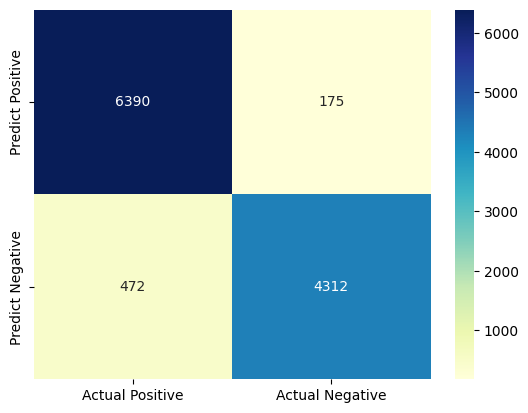

In [ ]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test,y_pred_test)
print(cm)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive', 'Actual Negative'],
                        index=['Predict Positive', 'Predict Negative'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

In [ ]:
svm = SVC(probability=True)
svm.fit(X_train, y_train)
y_score = svm.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % (roc_auc))
plt.plot([0, 1], [0, 1], 'k--') # Dashed diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()